<a href="https://colab.research.google.com/github/Kim-matthew-0422/gender-identification-image-tensorflow/blob/main/Gender-indentification-tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-271a8b02-52d8-9ee2-1268-275a421f915f)


In [ ]:
! pip install -q kaggle
! pip install kaggle-cli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle_cli-0.12.13-py3-none-any.whl
  Using cached cliff-2.8.3-py2.py3-none-any.whl (74 kB)
  Using cached lxml-4.0.0.tar.gz (4.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached progressbar2-3.34.3-py2.py3-none-any.whl (25 kB)
  Using cached configparser-5.3.0-py3-none-any.whl (19 kB)
  Using cached cssselect-1.0.3-py2.py3-none-any.whl (16 kB)
  Using cached MechanicalSoup-0.8.0-py2.py3-none-any.whl (8.9 kB)
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
  Using cached stevedore-4.1.1-py3-none-any.whl (50 kB)
  Using cached pbr-5.11.1-py2.py3-none-any.whl (112 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
  Running setup.py clean

In [ ]:
from google.colab import files

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls gender-classification-dataset

ls: cannot access 'gender-classification-dataset': No such file or directory


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /.kaggle/kaggle.json

chmod: cannot access '/.kaggle/kaggle.json': No such file or directory


In [ ]:
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2425         89  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1287         48  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5737        181  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("gender-classification-dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls

'download?datasetVersionNumber=1'     kaggle.json       sample_data
'download?datasetVersionNumber=1.1'   pizza_steak       Training
 gender-classification-dataset.zip    pizza_steak.zip   Validation
 helper_functions.py		      __pycache__


In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-17 04:35:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  14.0MB/s    in 8.6s    

2023-01-17 04:35:27 (12.1 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!ls

'download?datasetVersionNumber=1'     kaggle.json	  __pycache__
'download?datasetVersionNumber=1.1'   pizza_steak	  sample_data
 gender-classification-dataset.zip    pizza_steak.zip	  Training
 helper_functions.py		      pizza_steak.zip.1   Validation


ValueError: ignored

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("Training"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Training'.
There are 0 directories and 23243 images in 'Training/female'.
There are 0 directories and 23766 images in 'Training/male'.


In [ ]:
!ls Training/female

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("Training/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['female' 'male']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (105, 85, 3)


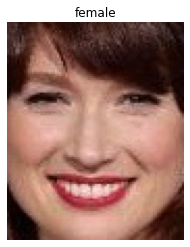

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="Training/",
                        target_class="female")

In [ ]:
img

array([[[65, 37, 33],
        [65, 37, 33],
        [59, 34, 29],
        ...,
        [29,  9,  8],
        [29,  9,  8],
        [40, 20, 19]],

       [[70, 42, 38],
        [72, 44, 40],
        [65, 40, 35],
        ...,
        [39, 19, 18],
        [32, 12, 11],
        [35, 15, 14]],

       [[65, 37, 33],
        [66, 38, 34],
        [58, 33, 29],
        ...,
        [53, 33, 32],
        [43, 23, 22],
        [32, 12, 11]],

       ...,

       [[73, 46, 39],
        [65, 40, 33],
        [43, 18, 14],
        ...,
        [36,  9,  2],
        [39, 12,  5],
        [41, 16, 11]],

       [[69, 40, 34],
        [67, 40, 33],
        [54, 29, 24],
        ...,
        [35,  8,  1],
        [40, 13,  6],
        [41, 16, 11]],

       [[57, 28, 22],
        [77, 48, 42],
        [67, 39, 35],
        ...,
        [40, 13,  6],
        [41, 14,  7],
        [44, 16, 12]]], dtype=uint8)

In [ ]:
import tensorflow as tf
tf.reduce_min(img), tf.reduce_max(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

NameError: ignored

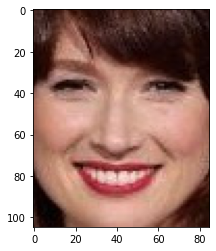

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir
     

--2023-01-17 04:36:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-17 04:36:02 (85.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
!ls

In [ ]:
train_dir = 'Training/'
test_dir = 'Validation/'

In [ ]:
walk_through_dir('Validation')

There are 2 directories and 0 images in 'Validation'.
There are 0 directories and 5841 images in 'Validation/female'.
There are 0 directories and 5808 images in 'Validation/male'.


In [ ]:
IMG_SIZE = (224,224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data fo

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model wei

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")


In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 3s 0us/step


In [ ]:
# Get a summary of our model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable

In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks=[checkpoint_callback]) # save best model weights to file

Epoch 1/5
1470/1470 [==============================] - 330s 215ms/step - loss: 0.2858 - accuracy: 0.8832 - val_loss: 0.2835 - val_accuracy: 0.8872
Epoch 2/5
1470/1470 [==============================] - 222s 151ms/step - loss: 0.2378 - accuracy: 0.9069 - val_loss: 0.2032 - val_accuracy: 0.9207
Epoch 3/5
1470/1470 [==============================] - 201s 137ms/step - loss: 0.2295 - accuracy: 0.9098 - val_loss: 0.1938 - val_accuracy: 0.9277
Epoch 4/5
1470/1470 [==============================] - 182s 124ms/step - loss: 0.2242 - accuracy: 0.9135 - val_loss: 0.2473 - val_accuracy: 0.9010
Epoch 5/5
1470/1470 [==============================] - 171s 116ms/step - loss: 0.2176 - accuracy: 0.9161 - val_loss: 0.2395 - val_accuracy: 0.9051


In [ ]:
# Evaluate model 
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

365/365 [==============================] - 26s 71ms/step - loss: 0.1749 - accuracy: 0.9324


[0.1748773455619812, 0.9324405789375305]

In [ ]:
#erm... well didn't exactly expect 93% right off the bat to be honest.

In [ ]:
#fine tuning.

# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) # start fr

Epoch 5/10
1470/1470 [==============================] - 182s 117ms/step - loss: 0.2017 - accuracy: 0.9215 - val_loss: 0.1148 - val_accuracy: 0.9514
Epoch 6/10
1470/1470 [==============================] - 167s 114ms/step - loss: 0.1700 - accuracy: 0.9362 - val_loss: 0.2899 - val_accuracy: 0.8773
Epoch 7/10
1470/1470 [==============================] - 163s 111ms/step - loss: 0.1554 - accuracy: 0.9427 - val_loss: 0.0649 - val_accuracy: 0.9745
Epoch 8/10
1470/1470 [==============================] - 161s 109ms/step - loss: 0.1436 - accuracy: 0.9490 - val_loss: 0.1164 - val_accuracy: 0.9578
Epoch 9/10
1470/1470 [==============================] - 161s 109ms/step - loss: 0.1363 - accuracy: 0.9507 - val_loss: 0.0933 - val_accuracy: 0.9635
Epoch 10/10
1470/1470 [==============================] - 158s 107ms/step - loss: 0.1317 - accuracy: 0.9526 - val_loss: 0.0666 - val_accuracy: 0.9769


In [ ]:
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

365/365 [==============================] - 26s 71ms/step - loss: 0.1087 - accuracy: 0.9615


[0.10871849954128265, 0.9614559412002563]

In [ ]:
#96 pecernto! almost perfecto! bravo!

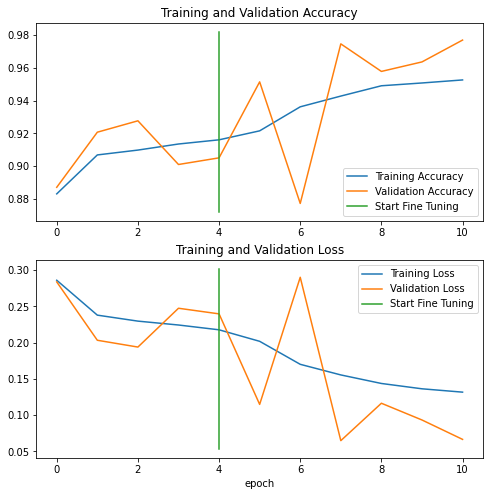

In [ ]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [ ]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take 

365/365 [==============================] - 26s 63ms/step


In [ ]:
len(pred_probs)

11649

In [ ]:
pred_probs.shape

(11649, 2)

In [ ]:
pred_probs[:10]

array([[9.9344289e-01, 6.5571479e-03],
       [9.9990344e-01, 9.6560521e-05],
       [8.8340265e-01, 1.1659728e-01],
       [9.9997544e-01, 2.4592659e-05],
       [9.9930406e-01, 6.9591554e-04],
       [9.9862587e-01, 1.3741965e-03],
       [9.9467295e-01, 5.3270459e-03],
       [8.8775158e-01, 1.1224843e-01],
       [9.9825150e-01, 1.7484397e-03],
       [9.9915767e-01, 8.4228266e-04]], dtype=float32)

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 2
What prediction probability sample 0 looks like:
 [0.9934429  0.00655715]
The class with the highest predicted probability by the model for sample 0: 0


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

11649

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy
     

0.9614559189630011

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 25ms/step


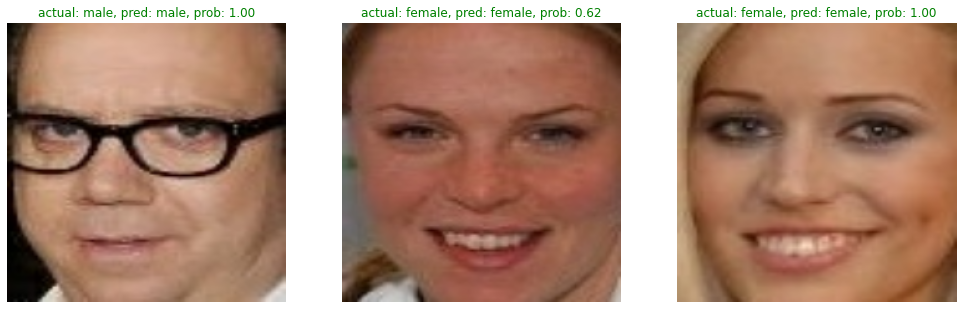

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
filepaths = []
for filepath in test_data.list_files('Validation/*/*.jpg',
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'Validation/female/112944.jpg.jpg',
 b'Validation/female/112950.jpg.jpg',
 b'Validation/female/112953.jpg.jpg',
 b'Validation/female/112956.jpg.jpg',
 b'Validation/female/112959.jpg.jpg',
 b'Validation/female/112961.jpg.jpg',
 b'Validation/female/112967.jpg.jpg',
 b'Validation/female/112968.jpg.jpg',
 b'Validation/female/112970.jpg.jpg',
 b'Validation/female/112973.jpg.jpg']

In [ ]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

img_path  y_true  y_pred  pred_conf  \
0  b'Validation/female/112944.jpg.jpg'       0       0   0.993443   
1  b'Validation/female/112950.jpg.jpg'       0       0   0.999903   
2  b'Validation/female/112953.jpg.jpg'       0       0   0.883403   
3  b'Validation/female/112956.jpg.jpg'       0       0   0.999975   
4  b'Validation/female/112959.jpg.jpg'       0       0   0.999304   

  y_true_classname y_pred_classname  
0           female           female  
1           female           female  
2           female           female  
3           female           female  
4           female           female

In [ ]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  pred_conf  \
0  b'Validation/female/112944.jpg.jpg'       0       0   0.993443   
1  b'Validation/female/112950.jpg.jpg'       0       0   0.999903   
2  b'Validation/female/112953.jpg.jpg'       0       0   0.883403   
3  b'Validation/female/112956.jpg.jpg'       0       0   0.999975   
4  b'Validation/female/112959.jpg.jpg'       0       0   0.999304   

  y_true_classname y_pred_classname  pred_correct  
0           female           female          True  
1           female           female          True  
2           female           female          True  
3           female           female          True  
4           female           female          True

In [ ]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  pred_conf  \
8199     b'Validation/male/074456.jpg.jpg'       1       0   0.999766   
8694     b'Validation/male/076905.jpg.jpg'       1       0   0.999456   
7945     b'Validation/male/073176.jpg.jpg'       1       0   0.998872   
9194     b'Validation/male/079111.jpg.jpg'       1       0   0.998609   
6762     b'Validation/male/067576.jpg.jpg'       1       0   0.998455   
9644     b'Validation/male/081261.jpg.jpg'       1       0   0.997715   
8446     b'Validation/male/075608.jpg.jpg'       1       0   0.996716   
8363     b'Validation/male/075231.jpg.jpg'       1       0   0.996652   
9747     b'Validation/male/081748.jpg.jpg'       1       0   0.996095   
9381     b'Validation/male/079993.jpg.jpg'       1       0   0.995632   
5871     b'Validation/male/063571.jpg.jpg'       1       0   0.995282   
3213   b'Validation/female/123155.jpg.jpg'       0       1   0.995221   
6586     b'Validation/male/066738.jpg.jpg'       1       0   0.993822   
10053    b'Validation/male/083223.jpg.jpg'       1       0   0.993623   
8017     b'Validation/male/073605.jpg.jpg'       1       0   0.993071   
8090     b'Validation/male/073957.jpg.jpg'       1       0   0.992966   
9741     b'Validation/male/081724.jpg.jpg'       1       0   0.992951   
9970     b'Validation/male/082839.jpg.jpg'       1       0   0.992941   
9704     b'Validation/male/081531.jpg.jpg'       1       0   0.992873   
6754     b'Validation/male/067537.jpg.jpg'       1       0   0.992862   

      y_true_classname y_pred_classname  pred_correct  
8199              male           female         False  
8694              male           female         False  
7945              male           female         False  
9194              male           female         False  
6762              male           female         False  
9644              male           female         False  
8446              male           female         False  
8363              male           female         False  
9747              male           female         False  
9381              male           female         False  
5871              male           female         False  
3213            female             male         False  
6586              male           female         False  
10053             male           female         False  
8017              male           female         False  
8090              male           female         False  
9741              male           female         False  
9970              male           female         False  
9704              male           female         False  
6754              male           female         False

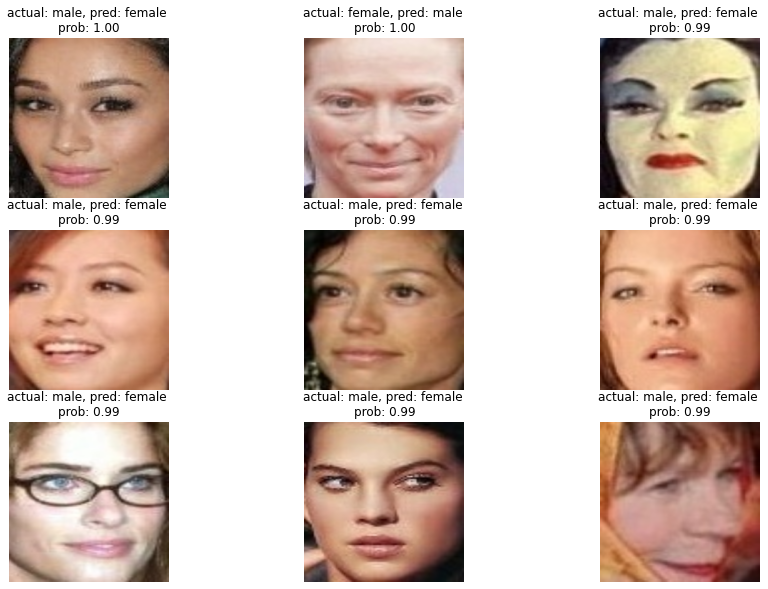

In [ ]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)


In [ ]:
!kaggle datasets download -d gpiosenka/gender-classification-from-an-image

 99% 171M/172M [00:12<00:00, 17.4MB/s]
100% 172M/172M [00:12<00:00, 14.2MB/s]


In [ ]:
!ls

 101_classes_10_percent_data_model_checkpoint.data-00000-of-00001
 101_classes_10_percent_data_model_checkpoint.index
 checkpoint
'download?datasetVersionNumber=1'
'download?datasetVersionNumber=1.1'
 gender-classification-dataset.zip
 gender-classification-from-an-image.zip
 helper_functions.py
 helper_functions.py.1
 kaggle.json
 pizza_steak
 pizza_steak.zip
 pizza_steak.zip.1
 __pycache__
 sample_data
 Training
 Validation


In [ ]:

zip_ref = zipfile.ZipFile('gender-classification-from-an-image.zip', "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls

 101_classes_10_percent_data_model_checkpoint.data-00000-of-00001
 101_classes_10_percent_data_model_checkpoint.index
 checkpoint
'download?datasetVersionNumber=1'
'download?datasetVersionNumber=1.1'
 gender
 gender-classification-dataset.zip
 gender-classification-from-an-image.zip
 gender_rev2
 helper_functions.py
 helper_functions.py.1
 kaggle.json
 pizza_steak
 pizza_steak.zip
 pizza_steak.zip.1
 __pycache__
 sample_data
 Training
 Validation


In [ ]:
!ls gender_rev2

 class_dict.csv			 'images to predict'	     train
 EfficientNetB1-gender-98.00.h5  'single image to predict'   valid
 gender.csv			  test


In [ ]:
!ls gender
!mkdir gender/combined

consolidated  duplicate_test_set  Mobilenet-99.50.h5  test  train  valid


In [ ]:
!cp -RT gender/test/male gender/combined

In [ ]:
!ls gender/combined

001.jpg  013.jpg  025.jpg  037.jpg  049.jpg  061.jpg  073.jpg  085.jpg	097.jpg
002.jpg  014.jpg  026.jpg  038.jpg  050.jpg  062.jpg  074.jpg  086.jpg	098.jpg
003.jpg  015.jpg  027.jpg  039.jpg  051.jpg  063.jpg  075.jpg  087.jpg	099.jpg
004.jpg  016.jpg  028.jpg  040.jpg  052.jpg  064.jpg  076.jpg  088.jpg	100.jpg
005.jpg  017.jpg  029.jpg  041.jpg  053.jpg  065.jpg  077.jpg  089.jpg
006.jpg  018.jpg  030.jpg  042.jpg  054.jpg  066.jpg  078.jpg  090.jpg
007.jpg  019.jpg  031.jpg  043.jpg  055.jpg  067.jpg  079.jpg  091.jpg
008.jpg  020.jpg  032.jpg  044.jpg  056.jpg  068.jpg  080.jpg  092.jpg
009.jpg  021.jpg  033.jpg  045.jpg  057.jpg  069.jpg  081.jpg  093.jpg
010.jpg  022.jpg  034.jpg  046.jpg  058.jpg  070.jpg  082.jpg  094.jpg
011.jpg  023.jpg  035.jpg  047.jpg  059.jpg  071.jpg  083.jpg  095.jpg
012.jpg  024.jpg  036.jpg  048.jpg  060.jpg  072.jpg  084.jpg  096.jpg


In [ ]:
!ls gender/test/female

001.jpg  013.jpg  025.jpg  037.jpg  049.jpg  061.jpg  073.jpg  085.jpg	097.jpg
002.jpg  014.jpg  026.jpg  038.jpg  050.jpg  062.jpg  074.jpg  086.jpg	098.jpg
003.jpg  015.jpg  027.jpg  039.jpg  051.jpg  063.jpg  075.jpg  087.jpg	099.jpg
004.jpg  016.jpg  028.jpg  040.jpg  052.jpg  064.jpg  076.jpg  088.jpg	100.jpg
005.jpg  017.jpg  029.jpg  041.jpg  053.jpg  065.jpg  077.jpg  089.jpg
006.jpg  018.jpg  030.jpg  042.jpg  054.jpg  066.jpg  078.jpg  090.jpg
007.jpg  019.jpg  031.jpg  043.jpg  055.jpg  067.jpg  079.jpg  091.jpg
008.jpg  020.jpg  032.jpg  044.jpg  056.jpg  068.jpg  080.jpg  092.jpg
009.jpg  021.jpg  033.jpg  045.jpg  057.jpg  069.jpg  081.jpg  093.jpg
010.jpg  022.jpg  034.jpg  046.jpg  058.jpg  070.jpg  082.jpg  094.jpg
011.jpg  023.jpg  035.jpg  047.jpg  059.jpg  071.jpg  083.jpg  095.jpg
012.jpg  024.jpg  036.jpg  048.jpg  060.jpg  072.jpg  084.jpg  096.jpg


In [ ]:
custom_food_images = ["gender/combined/" + img_path for img_path in os.listdir("gender/combined")]

In [ ]:
custom_food_images

['gender/combined/006.jpg',
 'gender/combined/011.jpg',
 'gender/combined/059.jpg',
 'gender/combined/078.jpg',
 'gender/combined/085.jpg',
 'gender/combined/002.jpg',
 'gender/combined/071.jpg',
 'gender/combined/087.jpg',
 'gender/combined/031.jpg',
 'gender/combined/027.jpg',
 'gender/combined/019.jpg',
 'gender/combined/062.jpg',
 'gender/combined/040.jpg',
 'gender/combined/003.jpg',
 'gender/combined/099.jpg',
 'gender/combined/072.jpg',
 'gender/combined/064.jpg',
 'gender/combined/026.jpg',
 'gender/combined/061.jpg',
 'gender/combined/038.jpg',
 'gender/combined/092.jpg',
 'gender/combined/023.jpg',
 'gender/combined/009.jpg',
 'gender/combined/020.jpg',
 'gender/combined/063.jpg',
 'gender/combined/081.jpg',
 'gender/combined/047.jpg',
 'gender/combined/010.jpg',
 'gender/combined/095.jpg',
 'gender/combined/056.jpg',
 'gender/combined/066.jpg',
 'gender/combined/086.jpg',
 'gender/combined/039.jpg',
 'gender/combined/051.jpg',
 'gender/combined/042.jpg',
 'gender/combined/01

In [ ]:
custom_food_images

['gender/test/female', 'gender/test/male']

1/1 [==============================] - 0s 47ms/step


<ipython-input-175-21be2afeb0bd>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


1/1 [==============================] - 0s 25ms/step


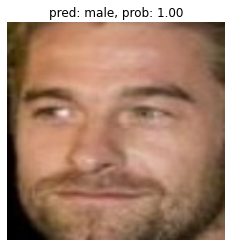

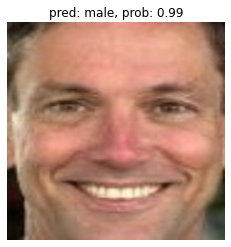

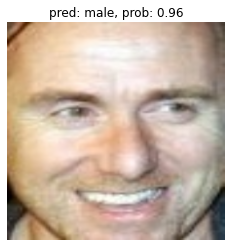

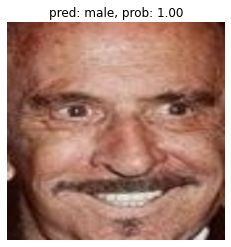

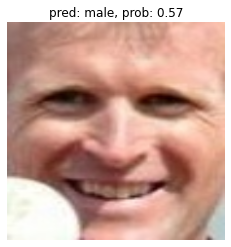

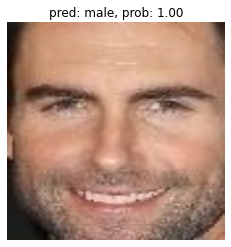

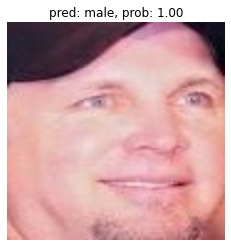

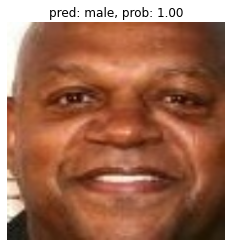

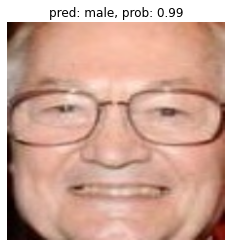

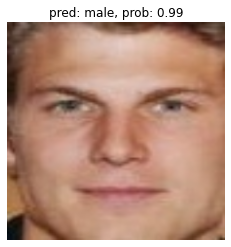

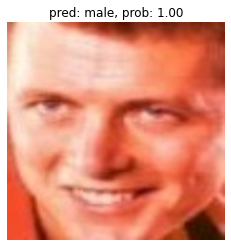

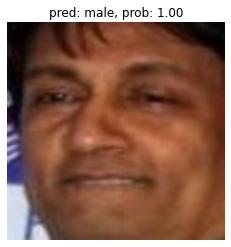

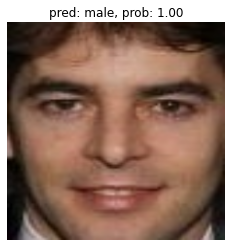

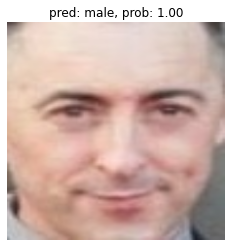

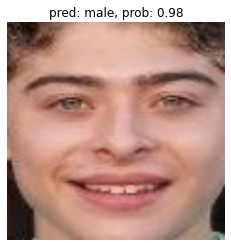

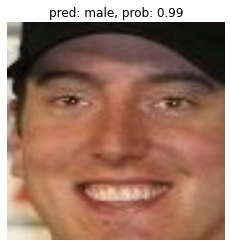

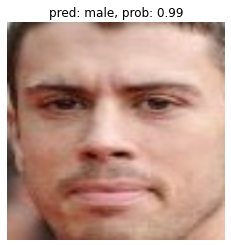

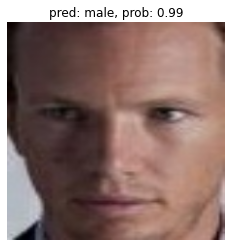

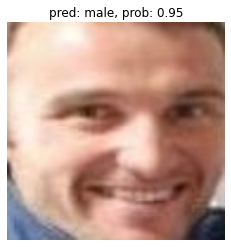

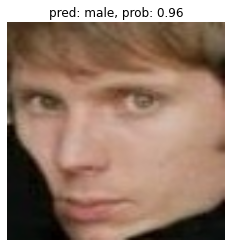

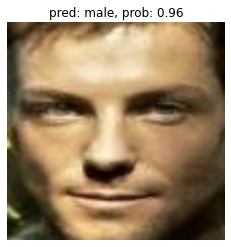

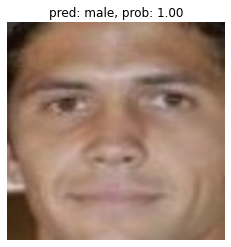

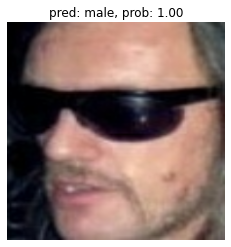

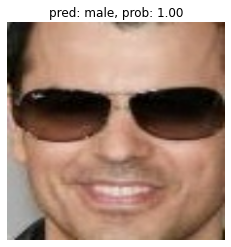

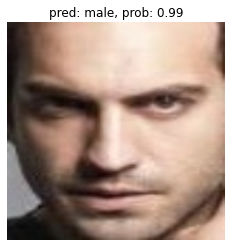

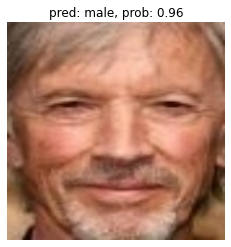

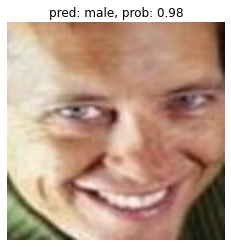

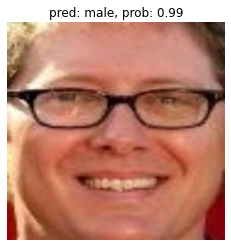

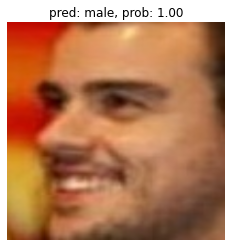

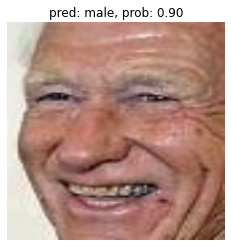

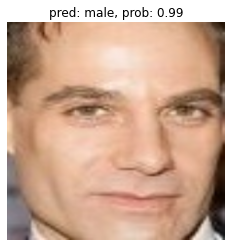

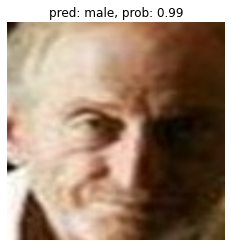

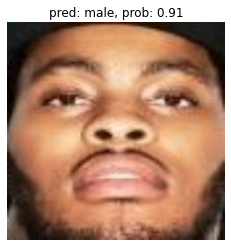

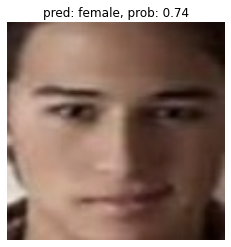

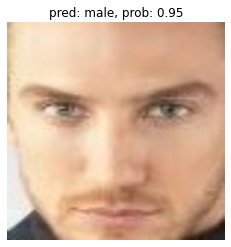

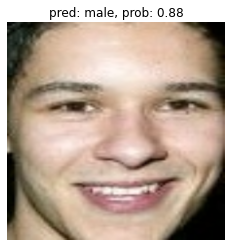

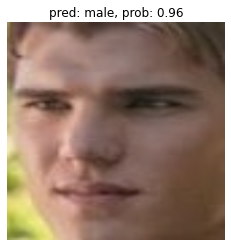

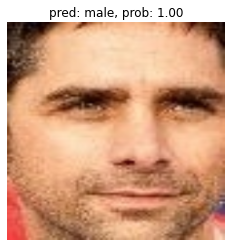

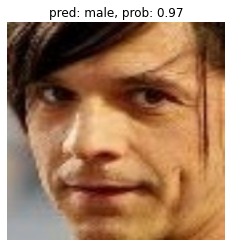

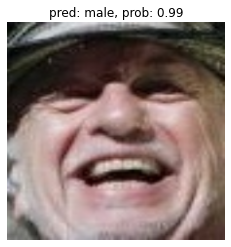

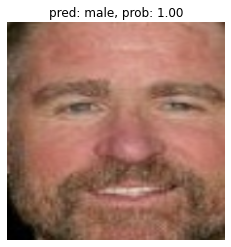

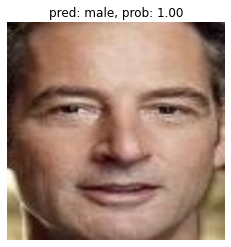

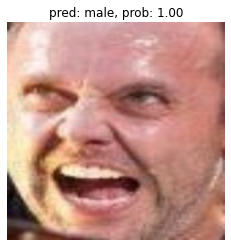

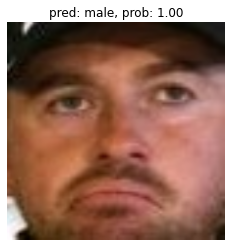

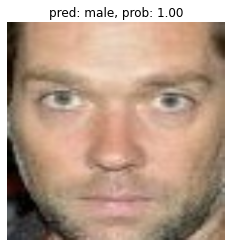

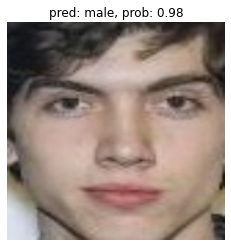

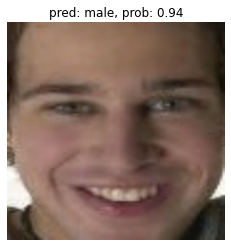

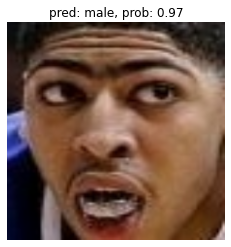

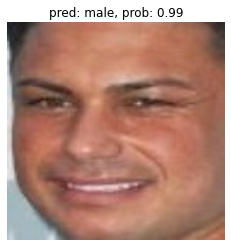

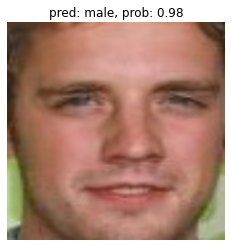

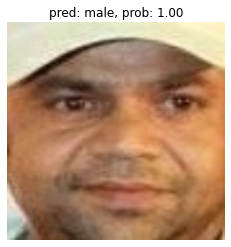

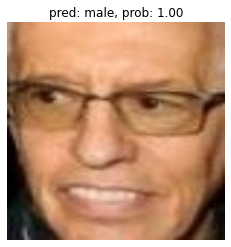

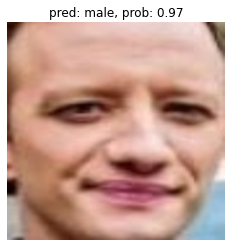

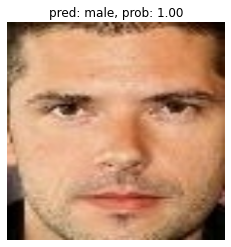

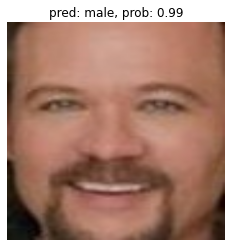

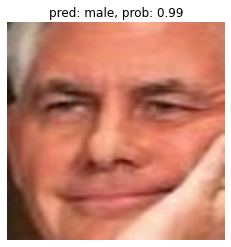

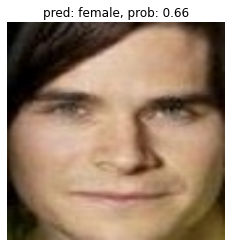

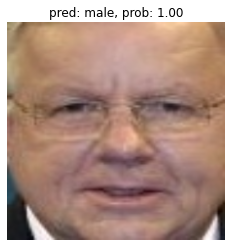

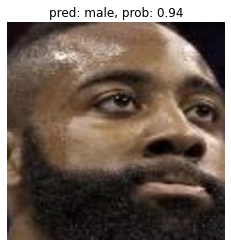

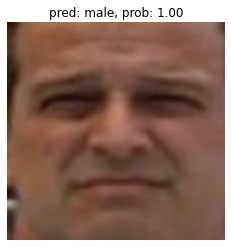

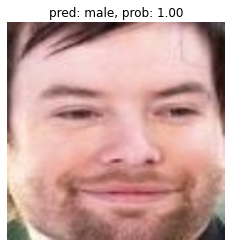

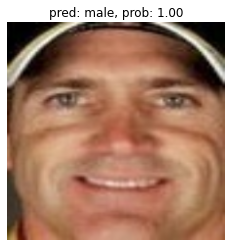

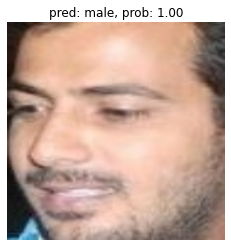

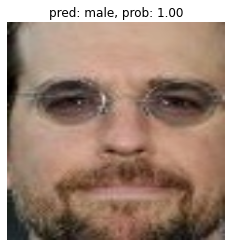

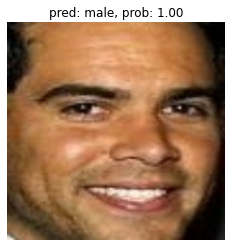

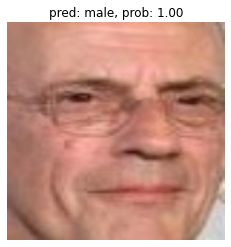

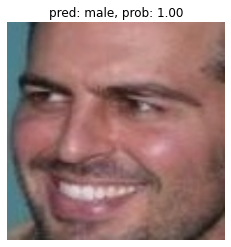

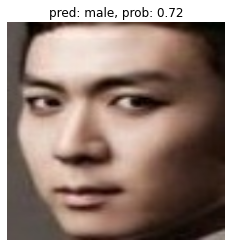

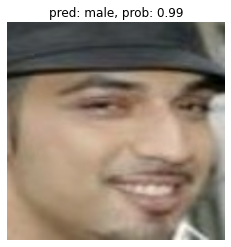

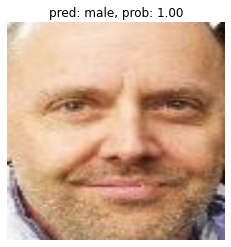

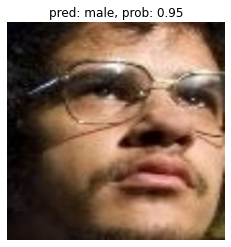

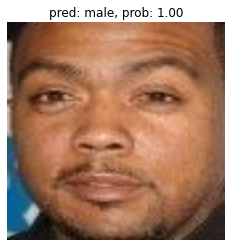

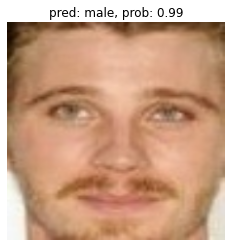

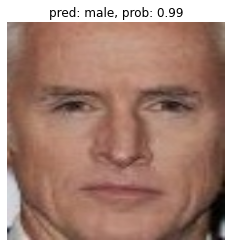

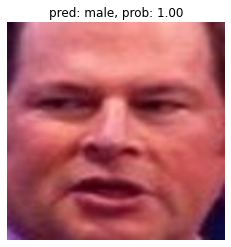

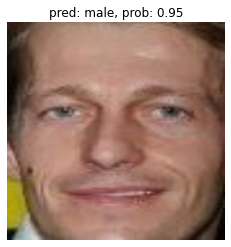

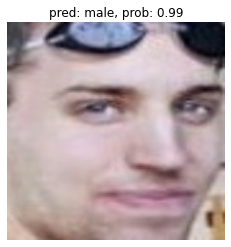

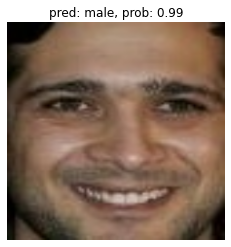

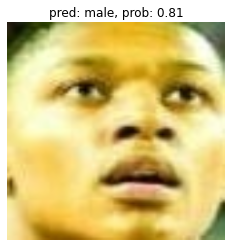

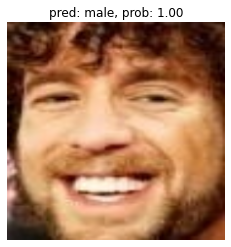

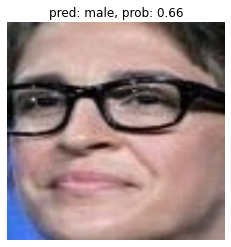

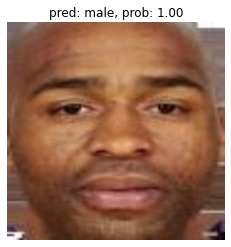

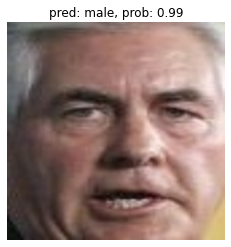

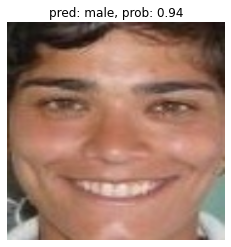

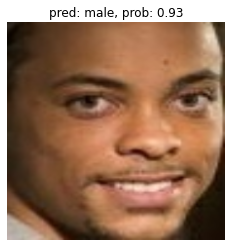

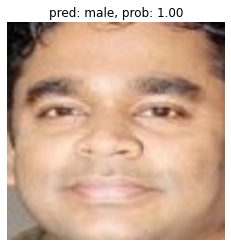

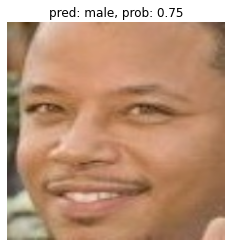

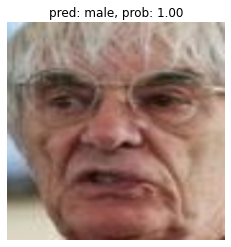

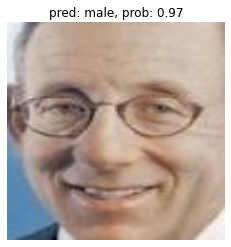

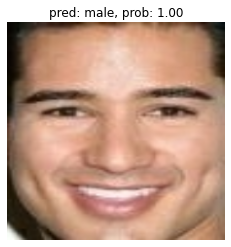

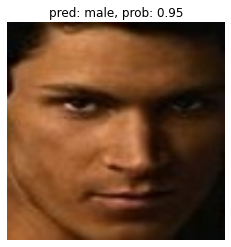

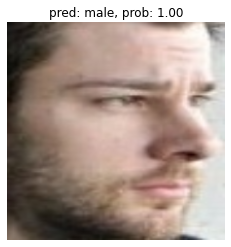

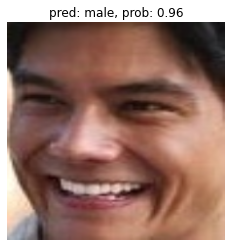

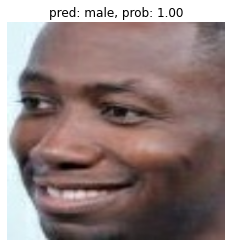

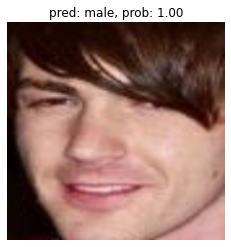

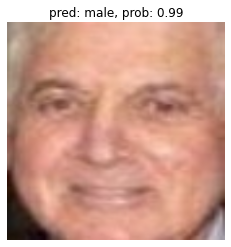

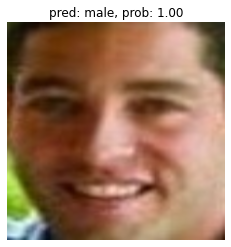

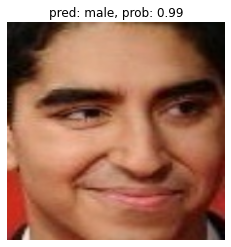

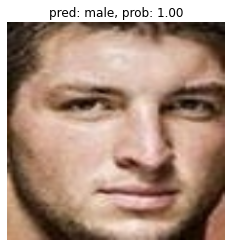

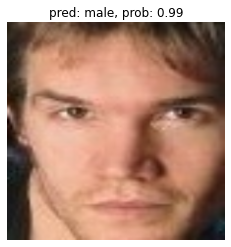

In [ ]:
# Make predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

# New Section